In [78]:
df_delhi = pd.read_csv("csv/Delhi.csv")
df_delhi['City'] = "Delhi"

df_kolkata = pd.read_csv("csv/Kolkata.csv")
df_kolkata['City'] = "Kolkata"

df_hyderabad = pd.read_csv("csv/Hyderabad.csv")
df_hyderabad['City'] = "Hyderabad"

df_bangalore = pd.read_csv("csv/Bangalore.csv")
df_bangalore['City']= "Bangalore"

df_mumbai = pd.read_csv("csv/Mumbai.csv")
df_mumbai['City'] = "Mumbai"

df_chennai = pd.read_csv("csv/Chennai.csv")
df_chennai['City']="Chennai"

In [80]:
loc_delhi = list(df_delhi['Location'].unique())
loc_kolkata = list(df_kolkata['Location'].unique())
loc_hyderabad = list(df_hyderabad['Location'].unique())
loc_bangalore = list(df_bangalore['Location'].unique())
loc_mumbai = list(df_mumbai['Location'].unique())
loc_chennai= list(df_chennai['Location'].unique())

In [82]:
with open("city_locations.py", "w") as f:
    f.write("loc_delhi = " + str(loc_delhi) + "\n\n")
    f.write("loc_kolkata = " + str(loc_kolkata) + "\n\n")
    f.write("loc_hyderabad = " + str(loc_hyderabad) + "\n\n")
    f.write("loc_bangalore = " + str(loc_bangalore) + "\n\n")
    f.write("loc_mumbai = " + str(loc_mumbai) + "\n\n")
    f.write("loc_chennai = " + str(loc_chennai) + "\n\n")

In [84]:
df = pd.concat([df_delhi, df_kolkata, df_hyderabad, df_bangalore, df_mumbai, df_chennai],ignore_index=True)
df.rename(columns={'No. of Bedrooms': 'Bedrooms'}, inplace=True)
df.head()

,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,Delhi
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Delhi
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Delhi
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Delhi
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Delhi


In [86]:
df.shape

(32963, 41)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32963 entries, 0 to 32962
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                32963 non-null  int64 
 1   Area                 32963 non-null  int64 
 2   Location             32963 non-null  object
 3   Bedrooms             32963 non-null  int64 
 4   Resale               32963 non-null  int64 
 5   MaintenanceStaff     32963 non-null  int64 
 6   Gymnasium            32963 non-null  int64 
 7   SwimmingPool         32963 non-null  int64 
 8   LandscapedGardens    32963 non-null  int64 
 9   JoggingTrack         32963 non-null  int64 
 10  RainWaterHarvesting  32963 non-null  int64 
 11  IndoorGames          32963 non-null  int64 
 12  ShoppingMall         32963 non-null  int64 
 13  Intercom             32963 non-null  int64 
 14  SportsFacility       32963 non-null  int64 
 15  ATM                  32963 non-null  int64 
 16  Club

In [90]:
for col in df.columns:
    print(df[col].value_counts())
    print("*"*20)

Price
4500000    386
4000000    367
3500000    340
5500000    319
6500000    310
          ... 
7088000      1
5396000      1
2141000      1
2066000      1
2509000      1
Name: count, Length: 4924, dtype: int64
********************
Area
800     814
1000    738
1100    488
650     451
1200    436
       ... 
3445      1
2303      1
2992      1
2224      1
2575      1
Name: count, Length: 2452, dtype: int64
********************
Location
Noida                     761
New Town                  711
Kharghar                  681
Thane West                577
Mira Road East            481
                         ... 
South Extension Part 1      1
Defence Colony              1
Khirki Extension            1
SULTANPUR                   1
Anna Nagar East             1
Name: count, Length: 1776, dtype: int64
********************
Bedrooms
2    14263
3    12596
1     3857
4     1983
5      214
6       33
7        9
8        7
9        1
Name: count, dtype: int64
********************
Resale
0    203

In [92]:
df['Location'] = df['Location'].apply(lambda x : x.strip())
location_count = df['Location'].value_counts()
location_count_less_10 = location_count[location_count <= 10]
df['Location'] = df['Location'].apply(lambda x: 'other' if x in location_count_less_10 else x)
df['Location'].value_counts()

Location
other                           3390
Noida                            761
New Town                         711
Kharghar                         681
Thane West                       577
                                ... 
N S C Bose Road  Narendrapur      11
5th Phase                         11
Elgin                             11
Kotturpuram                       11
Sector 10                         11
Name: count, Length: 509, dtype: int64

In [94]:
df['Price_per_sqft'] = df['Price']/ df['Area']
df.head()

,Price,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Price_per_sqft
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,Delhi,8750.000000
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Delhi,6000.000000
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Delhi,11111.111111
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Delhi,5747.126437
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Delhi,6444.444444


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Resale'}>,
        <Axes: title={'center': 'MaintenanceStaff'}>,
        <Axes: title={'center': 'Gymnasium'}>],
       [<Axes: title={'center': 'SwimmingPool'}>,
        <Axes: title={'center': 'LandscapedGardens'}>,
        <Axes: title={'center': 'JoggingTrack'}>,
        <Axes: title={'center': 'RainWaterHarvesting'}>,
        <Axes: title={'center': 'IndoorGames'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Intercom'}>,
        <Axes: title={'center': 'SportsFacility'}>,
        <Axes: title={'center': 'ATM'}>,
        <Axes: title={'center': 'ClubHouse'}>,
        <Axes: title={'center': 'School'}>,
        <Axes: title={'center': '24X7Security'}>],
       [<Axes: title={'center': 'PowerBackup'}>,
        <Axes: title={'center': 'CarParking'}>,
        <Axes: title={'center': '

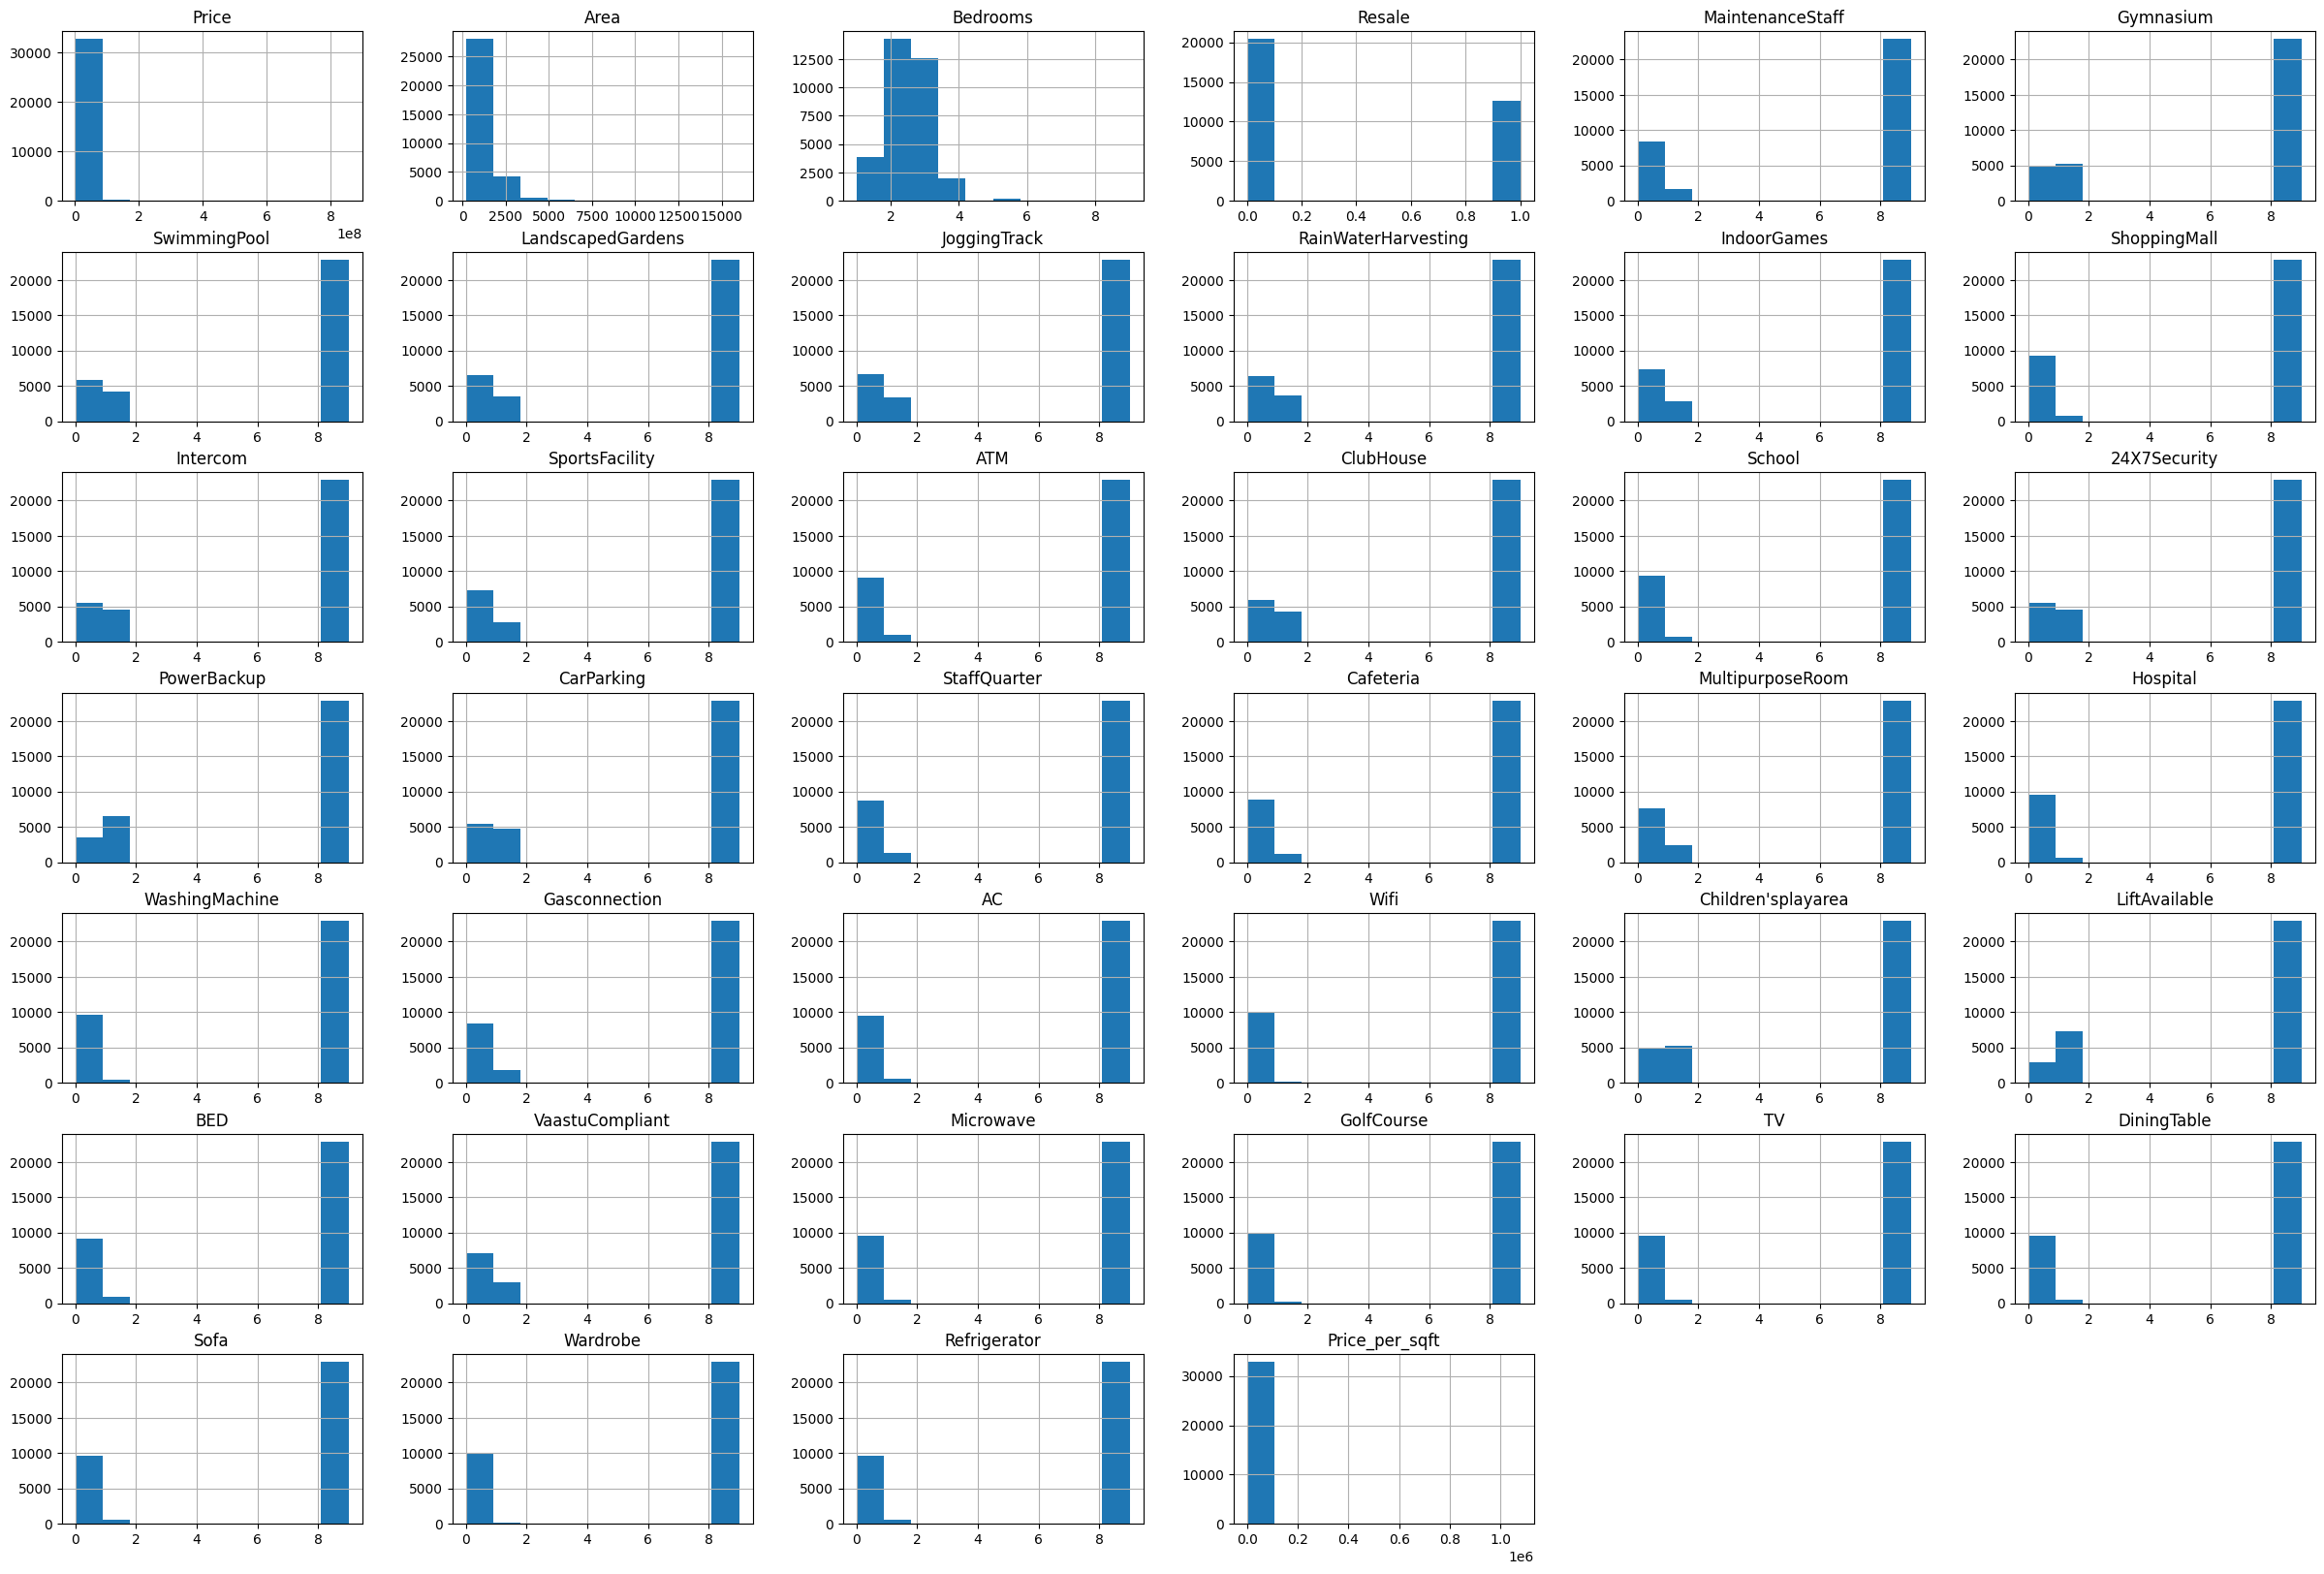

In [96]:
df.hist(figsize=(30,20))

In [97]:
X = df.iloc[:,1:]
X

,Area,Location,Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Price_per_sqft
0,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,Delhi,8750.000000
1,1000,Uttam Nagar,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Delhi,6000.000000
2,1350,Sarita Vihar,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Delhi,11111.111111
3,435,Uttam Nagar,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Delhi,5747.126437
4,900,Dwarka Mor,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Delhi,6444.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32958,1599,Korattur,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,Chennai,4899.936836
32959,740,Ambattur,2,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,Chennai,3254.054054
32960,1700,other,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,Chennai,3235.294118
32961,1599,Korattur,3,0,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,Chennai,2126.328956


In [98]:
y = df.iloc[:,0]
y

0        10500000
1         6000000
2        15000000
3         2500000
4         5800000
           ...   
32958     7834999
32959     2408000
32960     5500000
32961     3400000
32962     4500000
Name: Price, Length: 32963, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [104]:
print(X_train.shape)
print(X_test.shape)

(26370, 41)
(6593, 41)


In [106]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.feature_selection import RFE,SequentialFeatureSelector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [108]:
numeric_X_train = X_train.select_dtypes(include=['int64', 'float64'])
rfe = RFE(estimator=Ridge(), n_features_to_select=5)
rfe.fit(numeric_X_train, y_train)
selected_features = numeric_X_train.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['Bedrooms', 'Gasconnection', 'AC', 'Wifi', 'Microwave'], dtype='object')


In [110]:
final_X_train = X_train[selected_features.tolist() + ['Location', 'Price_per_sqft','City','Gymnasium','SwimmingPool','Resale']]
final_X_train = final_X_train.drop(['Wifi', 'Microwave'], axis=1)
final_X_train

,Bedrooms,Gasconnection,AC,Location,Price_per_sqft,City,Gymnasium,SwimmingPool,Resale
26813,2,9,9,Borivali West,66583.333333,Mumbai,9,9,1
10365,3,9,9,Kaikhali,2668.613139,Kolkata,9,9,0
17863,3,9,9,Poornapragna Housing Society Layout,5226.666667,Bangalore,9,9,0
24337,1,9,9,Karjat,2948.571429,Mumbai,9,9,1
12590,2,0,0,Darga Khaliz Khan,6240.249610,Hyderabad,1,1,0
...,...,...,...,...,...,...,...,...,...
16850,3,9,9,Electronic City Phase 2,5360.824742,Bangalore,9,9,0
6265,2,9,9,Behala,2633.985621,Kolkata,9,9,0
11284,2,9,9,Rajarhat,11188.117822,Kolkata,9,9,0
860,3,0,0,Dwarka Mor,5358.169935,Delhi,0,0,0


In [112]:
from sklearn.preprocessing import FunctionTransformer
log_transform = FunctionTransformer(np.log1p, validate=True)
log_cols = final_X_train.select_dtypes(include=['int64', 'float64'])
log_cols.columns

Index(['Bedrooms', 'Gasconnection', 'AC', 'Price_per_sqft', 'Gymnasium',
       'SwimmingPool', 'Resale'],
      dtype='object')

In [114]:
column_transform = make_column_transformer(
    (OneHotEncoder(sparse_output=False,handle_unknown='ignore'), ['Location','City']),
    (log_transform, log_cols.columns.tolist()),
)
lr = RandomForestRegressor()

In [116]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(column_transform, lr)

In [118]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Location', 'City']),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      validate=True),
                                                  ['Bedrooms', 'Gasconnection',
                                                   'AC', 'Price_per_sqft',
                                                   'Gymnasium', 'SwimmingPool',
                                                   'Resale'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [120]:
y_pred = pipe.predict(X_test)

In [122]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.8571575801485075


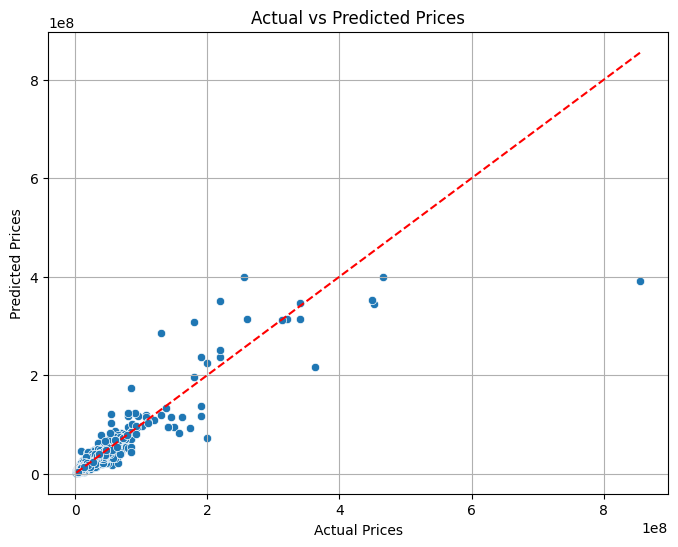

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

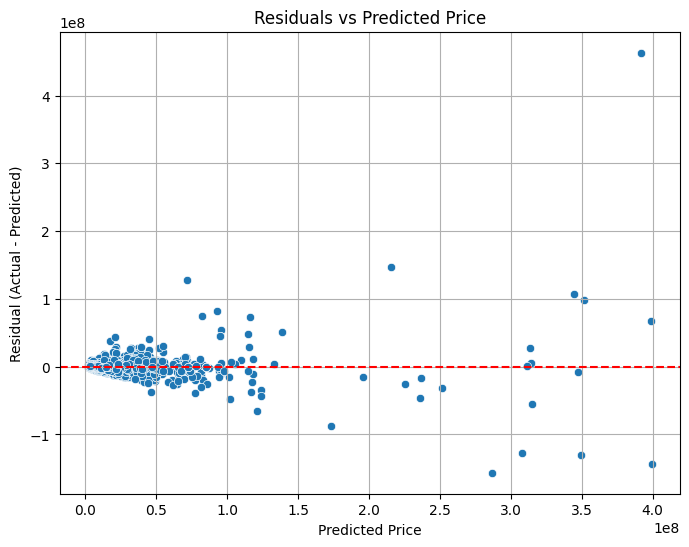

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted Price")
plt.grid(True)
plt.show()


In [128]:
final_X_train.columns

Index(['Bedrooms', 'Gasconnection', 'AC', 'Location', 'Price_per_sqft', 'City',
       'Gymnasium', 'SwimmingPool', 'Resale'],
      dtype='object')

In [130]:
import pickle

with open('trained_pipeline.pkl', 'wb') as f:
    pickle.dump(pipe, f)

In [132]:
X_test.iloc[10]

Area                           530
Location                     other
Bedrooms                         1
Resale                           1
MaintenanceStaff                 9
Gymnasium                        9
SwimmingPool                     9
LandscapedGardens                9
JoggingTrack                     9
RainWaterHarvesting              9
IndoorGames                      9
ShoppingMall                     9
Intercom                         9
SportsFacility                   9
ATM                              9
ClubHouse                        9
School                           9
24X7Security                     9
PowerBackup                      9
CarParking                       9
StaffQuarter                     9
Cafeteria                        9
MultipurposeRoom                 9
Hospital                         9
WashingMachine                   9
Gasconnection                    9
AC                               9
Wifi                             9
Children'splayarea  

In [144]:
pred = pipe.predict(X_test.iloc[[10]])
pred[0]

4224800.0